In [1]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np


In [2]:
radio = gpd.read_file("CABA_radios.shp")
radio["RADIO_REF_ID"] = radio.index
radio

,RADIO,VULNERABIL,NSE,CENTRO_DE_,HOSPITAL,POSTA_SANI,IDPROV,PROV,IDDPTO,DPTO,REDCODE,RADIOS_POB,RADIOS_HOG,RADIOS_LAT,RADIOS_LON,RADIOS_SUP,geometry,RADIO_REF_ID
0,020010101,0.802284,-0.456724,16.348,38.006,105.48,02,Ciudad Autónoma de Buenos Aires,02001,Comuna 1,020010101,336,65,-34.586689,-58.368836,1.794,"POLYGON ((-58.37430 -34.57870, -58.36801 -34.5...",0
1,020010201,0.817588,-0.456724,16.976,46.61,133.978,02,Ciudad Autónoma de Buenos Aires,02001,Comuna 1,020010201,478,161,-34.578623,-58.386987,0.027,"POLYGON ((-58.38920 -34.57818, -58.38893 -34.5...",1
2,020010202,0.820031,-0.456724,18.384,48.838,135.066,02,Ciudad Autónoma de Buenos Aires,02001,Comuna 1,020010202,401,128,-34.579194,-58.387533,0.018,"POLYGON ((-58.38909 -34.57855, -58.38890 -34.5...",2
3,020010203,0.818413,-0.456724,14.448,48.746,131.126,02,Ciudad Autónoma de Buenos Aires,02001,Comuna 1,020010203,337,104,-34.580158,-58.385503,0.011,"POLYGON ((-58.38603 -34.57947, -58.38508 -34.5...",3
4,020010204,0.825755,-0.456724,11.074,50.410000000000004,121.272,02,Ciudad Autónoma de Buenos Aires,02001,Comuna 1,020010204,602,163,-34.580006,-58.382654,0.136,"POLYGON ((-58.38562 -34.57822, -58.38551 -34.5...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,020152109,0.082985,0.455652,9.706,12.128,112.78,02,Ciudad Autónoma de Buenos Aires,02015,Comuna 15,020152109,863,392,-34.599727,-58.431162,0.020,"POLYGON ((-58.43221 -34.59950, -58.43113 -34.5...",3548
3549,020152110,0.073872,0.520911,7.61,13.622,113.328,02,Ciudad Autónoma de Buenos Aires,02015,Comuna 15,020152110,613,278,-34.598933,-58.430166,0.016,"POLYGON ((-58.43113 -34.59880, -58.43006 -34.5...",3549
3550,020152111,0.076228,0.530775,8.342,14.754,113.234,02,Ciudad Autónoma de Buenos Aires,02015,Comuna 15,020152111,697,335,-34.598226,-58.429006,0.018,"POLYGON ((-58.43006 -34.59811, -58.42899 -34.5...",3550
3551,020152112,0.193413,0.306683,9.968,17.104,113.058,02,Ciudad Autónoma de Buenos Aires,02015,Comuna 15,020152112,510,217,-34.597576,-58.427811,0.020,"POLYGON ((-58.42899 -34.59743, -58.42784 -34.5...",3551


In [3]:
radios = radio[["RADIO","RADIO_REF_ID","geometry"]]
radios

,RADIO,RADIO_REF_ID,geometry
0,020010101,0,"POLYGON ((-58.37430 -34.57870, -58.36801 -34.5..."
1,020010201,1,"POLYGON ((-58.38920 -34.57818, -58.38893 -34.5..."
2,020010202,2,"POLYGON ((-58.38909 -34.57855, -58.38890 -34.5..."
3,020010203,3,"POLYGON ((-58.38603 -34.57947, -58.38508 -34.5..."
4,020010204,4,"POLYGON ((-58.38562 -34.57822, -58.38551 -34.5..."
...,...,...,...
3548,020152109,3548,"POLYGON ((-58.43221 -34.59950, -58.43113 -34.5..."
3549,020152110,3549,"POLYGON ((-58.43113 -34.59880, -58.43006 -34.5..."
3550,020152111,3550,"POLYGON ((-58.43006 -34.59811, -58.42899 -34.5..."
3551,020152112,3551,"POLYGON ((-58.42899 -34.59743, -58.42784 -34.5..."


In [4]:
# Extraemos los centroides 

radios.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
radios.set_crs(epsg=4326, inplace=True)

C:\Users\Angelo\anaconda3\envs\M4OP\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,RADIO,RADIO_REF_ID,geometry
0,020010101,0,"POLYGON ((-58.37430 -34.57870, -58.36801 -34.5..."
1,020010201,1,"POLYGON ((-58.38920 -34.57818, -58.38893 -34.5..."
2,020010202,2,"POLYGON ((-58.38909 -34.57855, -58.38890 -34.5..."
3,020010203,3,"POLYGON ((-58.38603 -34.57947, -58.38508 -34.5..."
4,020010204,4,"POLYGON ((-58.38562 -34.57822, -58.38551 -34.5..."
...,...,...,...
3548,020152109,3548,"POLYGON ((-58.43221 -34.59950, -58.43113 -34.5..."
3549,020152110,3549,"POLYGON ((-58.43113 -34.59880, -58.43006 -34.5..."
3550,020152111,3550,"POLYGON ((-58.43006 -34.59811, -58.42899 -34.5..."
3551,020152112,3551,"POLYGON ((-58.42899 -34.59743, -58.42784 -34.5..."


In [6]:
radios["geometry"] = radios["geometry"].centroid
radios.head()

C:\Users\Angelo\AppData\Local\Temp\ipykernel_472\1144831836.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  radios["geometry"] = radios["geometry"].centroid
C:\Users\Angelo\anaconda3\envs\M4OP\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,RADIO,RADIO_REF_ID,geometry
0,020010101,0,POINT (-58.36884 -34.58669)
1,020010201,1,POINT (-58.38699 -34.57862)
2,020010202,2,POINT (-58.38753 -34.57919)
3,020010203,3,POINT (-58.38550 -34.58016)
4,020010204,4,POINT (-58.38265 -34.58001)


<AxesSubplot:>

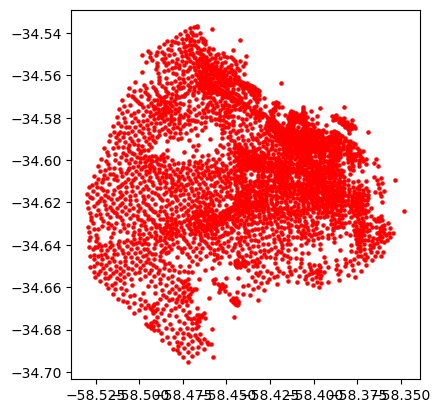

In [11]:
radios.plot(marker='o', color='red', markersize=5)

Ahora trabajamos con la tabla de CIRCUITOS

In [7]:
caba = gpd.read_file("CABA.shp")
caba.head()

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,0045,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,0037,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0018,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."


In [8]:
caba[["departamen","indec_d","indec_p","circuito","geometry"]]
caba2 = caba[["departamen","indec_d","indec_p","circuito","geometry"]]
caba2

,departamen,indec_d,indec_p,circuito,geometry
0,Comuna 1,001,02,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,Comuna 4,004,02,0045,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,Comuna 3,003,02,0037,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,Comuna 1,001,02,0018,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,Comuna 13,013,02,0141,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...,...,...,...
162,Comuna 13,013,02,0135,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,Comuna 14,014,02,0149,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,Comuna 9,009,02,0101,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,Comuna 10,010,02,0102,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


In [9]:
padcaba= caba2["RADIO"] = caba2["indec_p"] + caba2["indec_d"] + caba2["circuito"]
padcaba = padcaba.to_frame()
padcaba = padcaba.rename(columns={"0":"RADIO"})


C:\Users\Angelo\anaconda3\envs\M4OP\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


HAY QUE AGREGAR LA COLUMNA DE ESTE DF AL OTRO